In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
hotel_dataset=pd.read_csv('Downloads/DS1_C5_S5_Hotel Dataset (1).csv')
hotel_dataset.shape #(2097, 32)
hotel_dataset.info()
# columnsa with missing values
#agent, company

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [12]:
hotel_dataset['agent'].isnull().sum()
hotel_dataset['agent'].fillna(hotel_dataset['agent'].median(),inplace=True)


C:\Users\asher\AppData\Local\Temp\ipykernel_27356\4009952128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_dataset['agent'].fillna(hotel_dataset['agent'].median(),inplace=True)


In [13]:
hotel_dataset['agent'].isnull().sum()

0

In [14]:
hotel_dataset['company'].unique()

array([ nan, 281., 360., 498., 223.,   9.,  11., 183., 197., 174., 169.,
       153., 293., 332., 351.,  73.])

In [15]:
hotel_dataset['company'].isnull().sum()# droping it since this column does not look important

2066

In [16]:
hd=hotel_dataset

In [17]:
hd=hd.drop('company',axis=1)

# 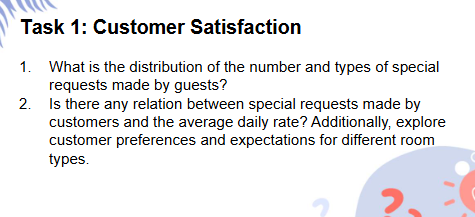

# 1. What is the distribution of the number and types of special requests made by guests?

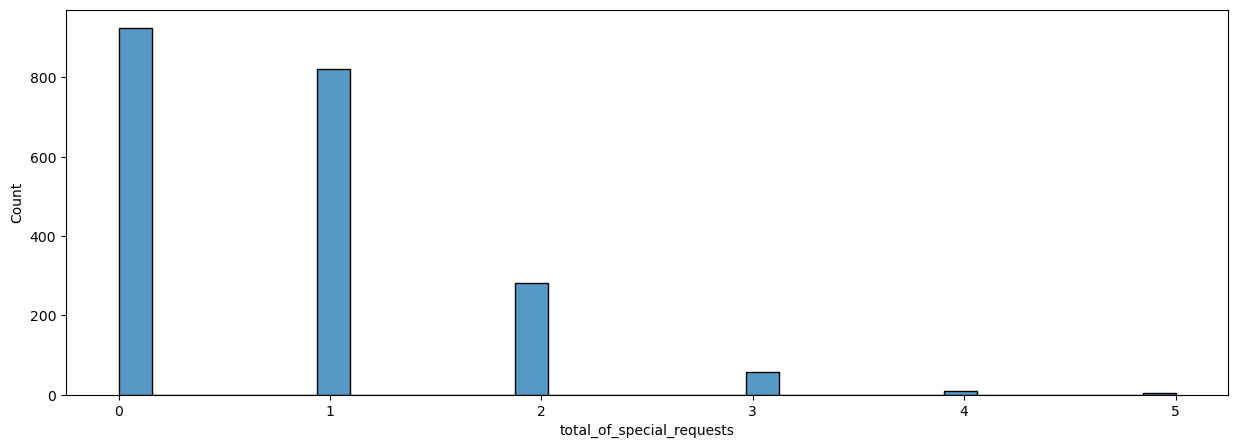

In [20]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(hd['total_of_special_requests'])
plt.show()

# most people have not made special requests and  5 is the least made special requests

# 2. Is there any relation between special requests made by
customers and the average daily rate? Additionally, explore customer preferences and expectations for different room types.
?

In [23]:
hd.info()#total_of_special_requests,adr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

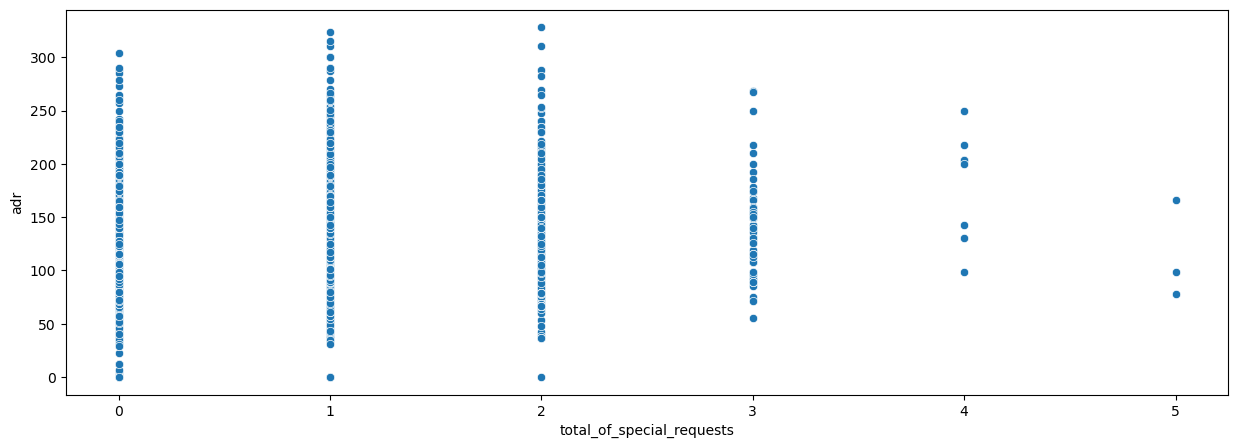

In [74]:
fig,ax=plt.subplots(figsize=(15,5))
sns.scatterplot(x=hd['total_of_special_requests'],y=hd['adr'])
plt.show()

# there is no relationship betwween  total_of_special_requests and adr

# 11)customer_type, booking_changes

# since one of the column is customer_tpe is cateogorical there is no relationship between the two.

days_in_waiting_list,booking_changes

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

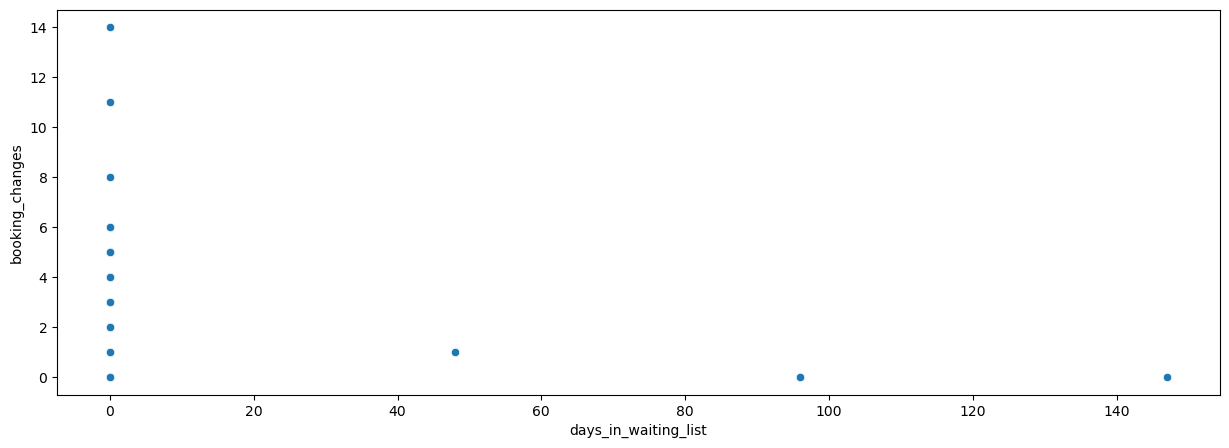

In [30]:
fig,ax=plt.subplots(figsize=(15,5))
sns.scatterplot(x=hd['days_in_waiting_list'],y=hd['booking_changes'])
plt.show()

# there is no relationship betwwen the two variable

##### 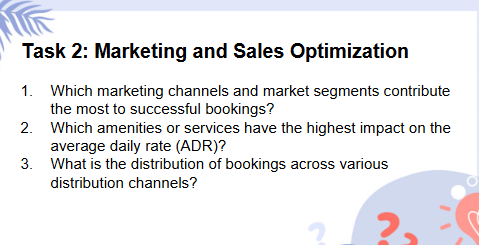

# Task 2: Marketing and Sales Optimization
1. Which marketing channels and market segments contribute the most to successful bookings?


In [34]:
p=hd[hd['is_canceled']==0]

In [35]:
#distribution_channel,market_segment

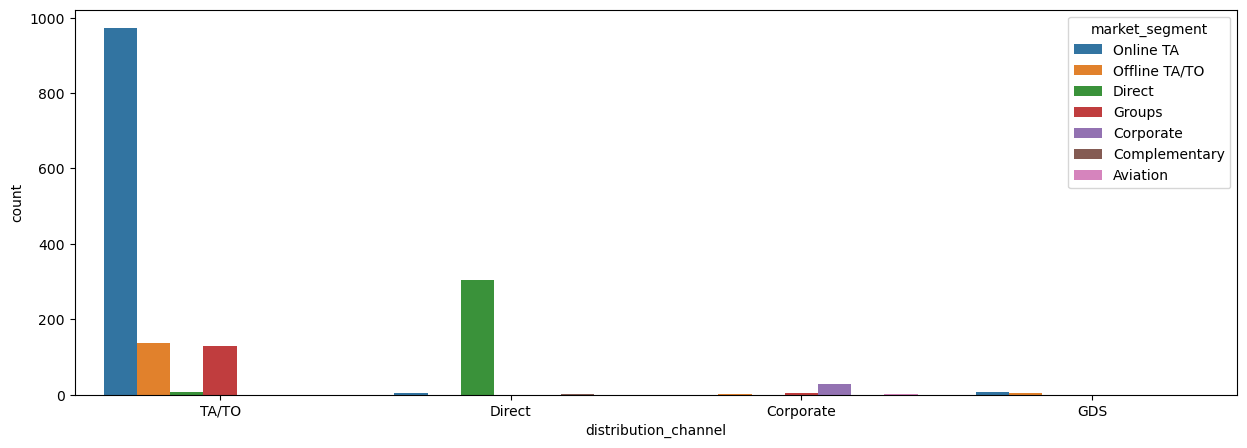

In [36]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x=p['distribution_channel'],hue=p['market_segment'])
plt.show()

# TA/TO channel had the most succesful conversion.In that marketing segment Online TA had the most market and lead to succesful conversions.

# 2. Which amenities or services have the highest impact on the average daily rate (ADR)?


In [39]:
hd.info()#adr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [40]:
cat=hd.select_dtypes(include='object')
num=hd.select_dtypes(exclude='object')

In [41]:
c=[]
for x in cat.columns:
    c.append(x)
c

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [42]:
n=[]
for x in num.columns:
    n.append(x)
n

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [43]:
def check(x):
    if x in c:
        print('Cateogorical Column')
    elif x in n:
        print('Numerical Column')
    

In [44]:
check('customer_type')

Cateogorical Column


In [45]:
for x in num.columns:
    z=hd[x].corr(hd['adr'])*100
    #print(x,':',z)
    if z>0:
        print(x,':',z)

is_canceled : 13.888499382031801
arrival_date_year : 19.832020285654618
arrival_date_week_number : 14.992690067331665
arrival_date_day_of_month : 8.161899274914436
adults : 30.019548581989277
children : 40.6126071092167
previous_bookings_not_canceled : 0.7487558430403128
booking_changes : 2.3628783918089504
agent : 6.849888648273425
adr : 99.99999999999999
required_car_parking_spaces : 8.777469779938576
total_of_special_requests : 11.470414743768995


C:\Users\asher\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\asher\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# children is the column after adr itself to show the most correlated has a correlation of  40.6126071092167%.

# 3. What is the distribution of bookings across various distribution channels?
?

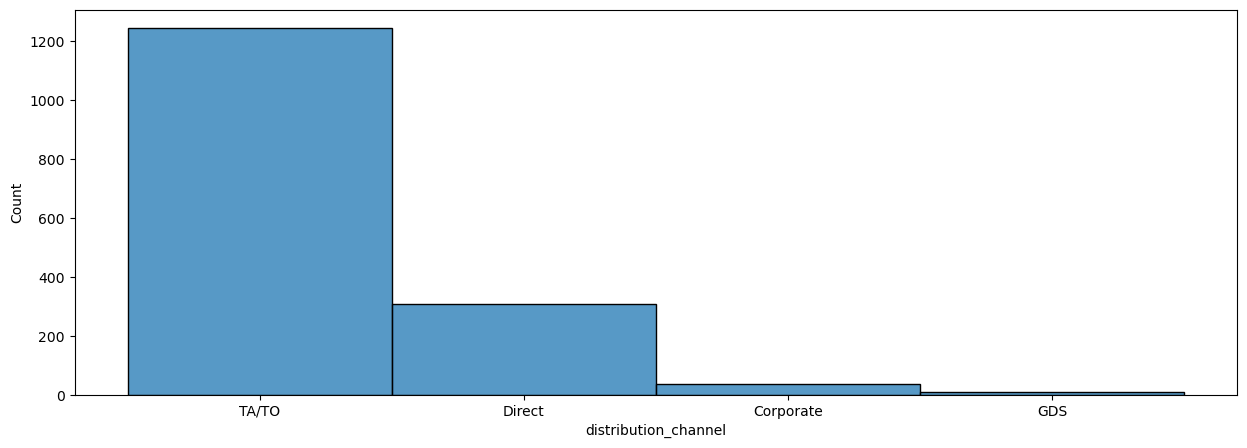

In [48]:
fig,ax=plt.subplots(figsize=(15,5))
sns.histplot(x=p['distribution_channel'])
plt.show()

# TA/TO is the most distributed channel and GDS has a bad conversion rate.

# summary of the projrct:


# 1)This analysis examines a comprehensive hotel booking dataset containing 2,078 reservations across 32 variables from 2015 to 2017 capturing critical operational metrics for both Resort and City Hotel properties. 
# 2) Analysis of lead times reveals substantial variation in reservation planning behaviors. Minimum lead times appear as low as 9 days (entry 3) while maximums extend to 189 days (entry 2094), suggesting different customer planning horizons between last-minute business travelers and vacation planners
# 3)The customer_type variable shows complete dominance of Transient guests (non-contract individuals) across all sampled entries, indicating minimal group or contract business during this period.

# 4) Cancellation patterns show 0 values for is_canceled in all sampled entries, suggesting either analysis of completed stays only or particularly low  cancellation rates during this period. 
# 5)Month analysis shows strong summer seasonality with July/August dominance .

# 6)ADR ranges €80.10-€153.00 between property types
# 7)July-August peak booking months